In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Reading data

df = pd.read_csv('./data/daily_weather_10_years.csv')
df.head()

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,1/01/2009,37.8,35,12.7,29.7,26.4,36.8,274,0.0,0.0,0.0,40.1,34.5,44,27,29.762,29.596,41.4,59.0,40.1
1,2/01/2009,43.2,32,14.7,29.5,12.8,18.0,240,0.0,0.0,0.0,52.8,37.5,43,16,29.669,29.268,35.7,51.0,52.8
2,3/01/2009,25.7,60,12.7,29.7,8.3,12.2,290,0.0,0.0,0.0,41.2,6.7,89,35,30.232,29.260,25.3,38.0,41.2
3,4/01/2009,9.3,67,0.1,30.4,2.9,4.5,47,0.0,0.0,0.0,19.4,-0.0,79,35,30.566,30.227,12.7,20.0,32.0
4,5/01/2009,23.5,30,-5.3,29.9,16.7,23.1,265,0.0,0.0,0.0,30.3,15.1,56,13,30.233,29.568,38.0,53.0,32.0


<AxesSubplot:title={'center':'Average temperature across years'}, xlabel='Day', ylabel='Average temperature (°F)'>

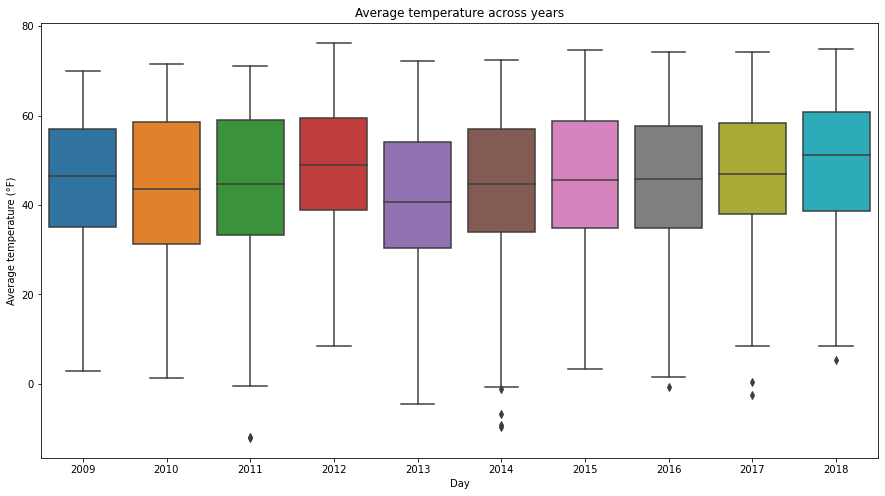

In [11]:
#Boxplot of average temperature across the years

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

df['Year'] = pd.DatetimeIndex(df['Day']).year
fin = df[df['Year'] == 2009]['Average temperature (°F)']

for year in range(2010, 2019):
    yr = df[df['Year'] == year]['Average temperature (°F)']
    fin = pd.concat([fin.reset_index(drop=True), yr.reset_index(drop=True)] , axis=1)

fin.columns= [*range(2009,2019)]

plt.title('Average temperature across years')
ax.set_xlabel('Day')
ax.set_ylabel('Average temperature (°F)')

sns.boxplot(data=fin[[*range(2009,2019)]])

<AxesSubplot:title={'center':'Correlation'}>

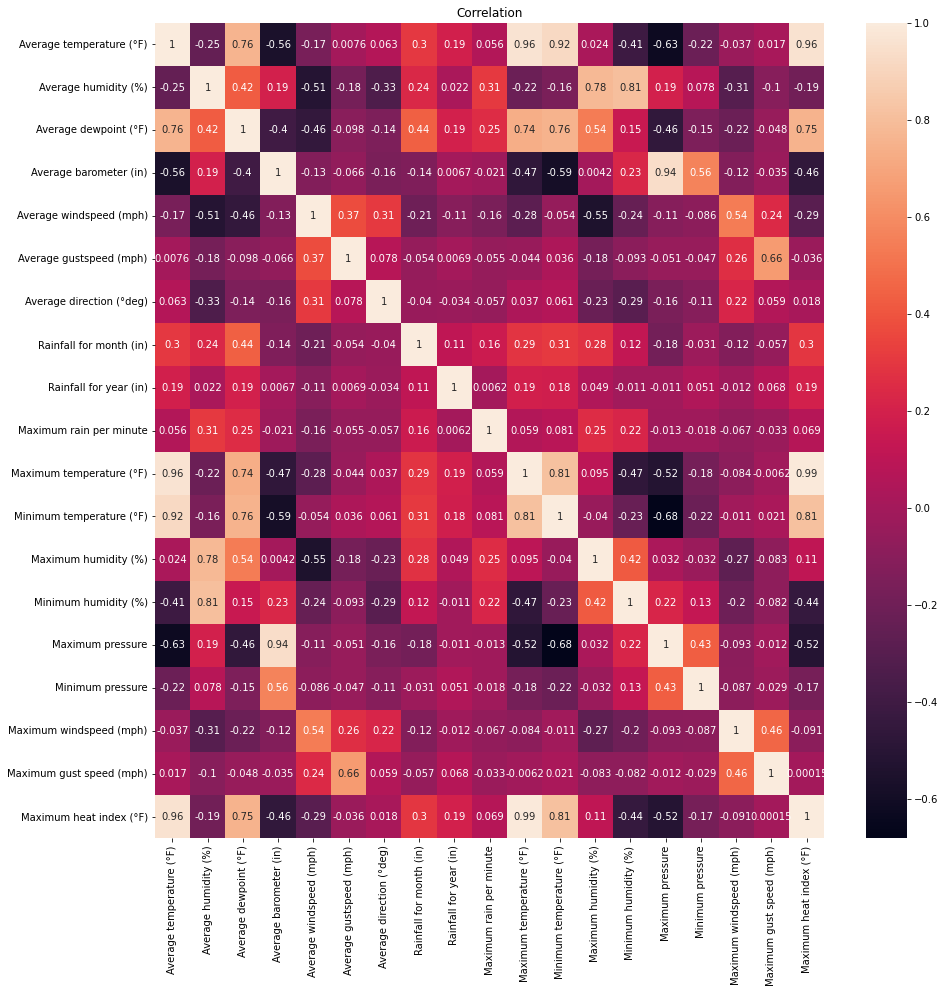

In [12]:
# Heatmap for showing corelation between columns of the weather dataset

fig = plt.figure(figsize=(15, 15))
plt.title('Correlation')
sns.heatmap(data=df.iloc[:,1:-1].corr(), annot=True)

<AxesSubplot:title={'center':'Average temperature distribution'}, xlabel='Average temperature', ylabel='Density'>

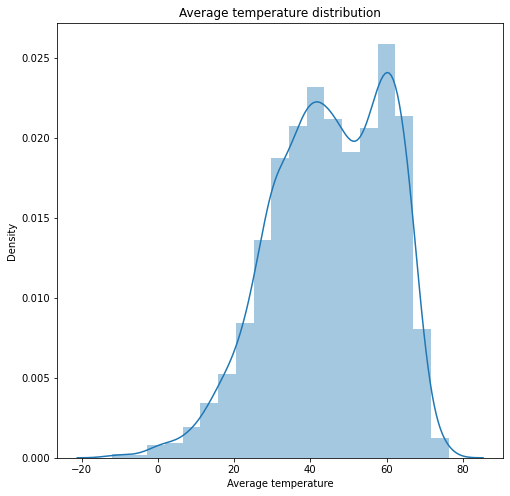

In [13]:
# Show kde plot and distplot in same plot for distribiution over average temperature

fig = plt.figure(figsize=(8, 8))
df.rename(columns={'Average temperature (°F)':'Average temperature'}, inplace=True)
plt.title('Average temperature distribution')
plt.legend([],[], frameon=False)
sns.distplot(df['Average temperature'], kde=True, bins= 19)

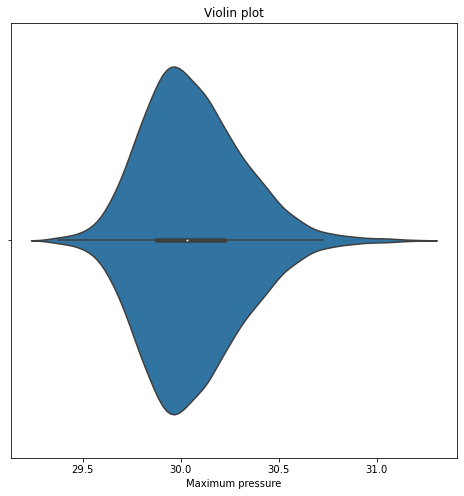

In [14]:
#  Draw Violin plot for maximum pressure

fig = plt.figure(figsize=(8, 8))
plt.title('Violin plot')
plot4 = sns.violinplot(df['Maximum pressure'])